In [4]:
from ema_workbench import ema_logging, load_results

ema_logging.log_to_stderr(level=ema_logging.INFO)

n = 10
fn = r'../data/{} runs.tar.gz'.format(n)
experiments, outcomes = load_results(fn)
results = load_results(fn)


['', 'D:\\Workspace\\EMAworkbench', 'C:\\Anaconda2\\python27.zip', 'C:\\Anaconda2\\DLLs', 'C:\\Anaconda2\\lib', 'C:\\Anaconda2\\lib\\plat-win', 'C:\\Anaconda2\\lib\\lib-tk', 'C:\\Anaconda2', 'C:\\Anaconda2\\lib\\site-packages', 'C:\\Anaconda2\\lib\\site-packages\\FontTools', 'C:\\Anaconda2\\lib\\site-packages\\Orange\\orng', 'C:\\Anaconda2\\lib\\site-packages\\Sphinx-1.4.6-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\bz2file-0.98-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\setuptools-28.2.0-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\ptm-0.0.1-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\platypus-0.1-py2.7.egg', 'C:\\Anaconda2\\lib\\site-packages\\jpype1-0.6.2-py2.7-win-amd64.egg', 'C:\\Anaconda2\\lib\\site-packages\\win32', 'C:\\Anaconda2\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda2\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda2\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tewdewildt\\.ipython']


[MainProcess/INFO] results loaded succesfully from D:\Workspace\EMAworkbench\ema_workbench\examples\data\10 runs.tar.gz
[MainProcess/INFO] results loaded succesfully from D:\Workspace\EMAworkbench\ema_workbench\examples\data\10 runs.tar.gz


In [2]:
from ema_workbench.analysis import prim

import numpy as np
import matplotlib.pyplot as plt


In [3]:
# desired__nr_lines = 24
# nr_cases = experiments.shape[0]
# indices = np.arange(0, nr_cases, nr_cases/desired__nr_lines)

In [4]:
# def classify(data):
#     data = data["number_of_households_owning_ISG_app"]

from ema_workbench.analysis.plotting import envelopes, lines
from ema_workbench.analysis.plotting_util import KDE

#from analysis.plotting_util import VIOLIN

default_flow = 2.178849944502783e7
ooi_name = "sheep"
outcome = outcomes[ooi_name]
outcome = outcome/default_flow

ooi = np.zeros(outcome.shape[0])
temp_outcomes = {ooi_name: ooi}
print ooi.shape



(10L,)


In [5]:
fig, axes = envelopes(results, group_by='policy', density=KDE, fill=True)

# we can access each of the axes and make changes
for key, value in axes.iteritems():
    # the key is the name of the outcome for the normal plot
    # and the name plus '_density' for the endstate distribution
    if key.endswith('_density'):
        value.set_xscale('log')

plt.show()

[MainProcess/WARNING] value error when plotting for None


(1L, 101L)
(1L, 101L)
(1L, 101L)
(1L,)


ValueError: Argument dimensions are incompatible

In [6]:
desired__nr_lines = 5
nr_cases = ooi.shape[0]
indices = np.arange(0, nr_cases, nr_cases/desired__nr_lines)

In [7]:
# envelopes((experiments, temp_outcomes),
#           fill=True, density=KDE)

lines(results, outcomes_to_show = 'sheep', density=KDE,
                  show_envelope=True, experiments_to_show=indices, 
                  titles="")

plt.savefig("../pictures/KDE_PRIM_30.png", dpi=75)

plt.show()

[MainProcess/INFO] no time dimension found in results


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [44]:
import scipy as sp
ooi = "percentage_of_early_majority_with_ISG_appliances"
print sp.stats.percentileofscore(outcomes[ooi][:,-1].ravel(), 25)
# print sp.stats.percentileofscore(outcomes[ooi][:,299].ravel(), 25)

KeyError: 'percentage_of_early_majority_with_ISG_appliances'

In [70]:
ooi = "percentage_of_early_majority_with_ISG_appliances"
def classify(data):
    data = data[ooi]
    data = np.mean(data,axis=1)
#     print data.shape
    data = data[:,-1]
#     print data.shape
    classes = np.zeros(data.shape)
    classes[data<60] = 1
    return classes

# print outcomes.keys()

prim_obj = prim.Prim((experiments, outcomes), classify, threshold=0.8)

In [71]:
box1 = prim_obj.find_box()

[INFO/MainProcess] 100 points remaining, containing 37 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.05, coverage: 0.135135135135, density: 1.0 restricted_dimensions: 11.0


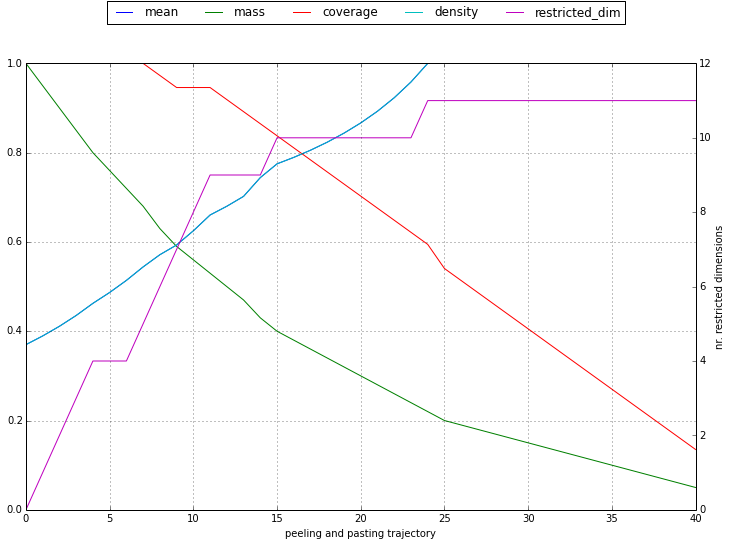

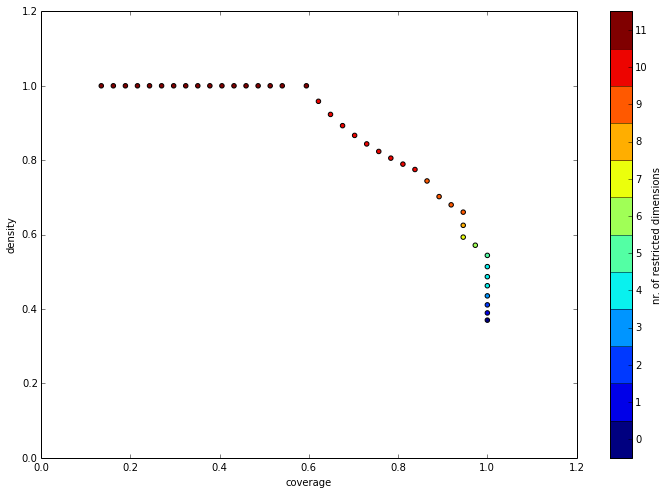

In [72]:
box1.show_ppt()
box1.show_tradeoff()
plt.show()

In [73]:
box1.write_ppt_to_stdout()

    coverage   density  mass      mean  res dim
0   1.000000  0.370000  1.00  0.370000        0
1   1.000000  0.389474  0.95  0.389474        1
2   1.000000  0.411111  0.90  0.411111        2
3   1.000000  0.435294  0.85  0.435294        3
4   1.000000  0.462500  0.80  0.462500        4
5   1.000000  0.486842  0.76  0.486842        4
6   1.000000  0.513889  0.72  0.513889        4
7   1.000000  0.544118  0.68  0.544118        5
8   0.972973  0.571429  0.63  0.571429        6
9   0.945946  0.593220  0.59  0.593220        7
10  0.945946  0.625000  0.56  0.625000        8
11  0.945946  0.660377  0.53  0.660377        9
12  0.918919  0.680000  0.50  0.680000        9
13  0.891892  0.702128  0.47  0.702128        9
14  0.864865  0.744186  0.43  0.744186        9
15  0.837838  0.775000  0.40  0.775000       10
16  0.810811  0.789474  0.38  0.789474       10
17  0.783784  0.805556  0.36  0.805556       10
18  0.756757  0.823529  0.34  0.823529       10
19  0.729730  0.843750  0.32  0.843750  

In [74]:
box1.inspect(16)
box1.inspect(17)
box1.inspect(34)


box        mean      mass  coverage   density   res dim
16         0.79      0.38      0.81      0.79        10

uncertainty                                              box 16      
                                                        min       max    qp values
Interaction_1_multiplicator                            0.59 -    1.45     7.21e-02
Number_of_month_before_decision_rejection                21 -      60     1.39e-01
A_S_L_preferred_information_source_late_majority_2     0.25 -    0.34     1.45e-01
A_S_L_preferred_information_source_early_majority_2    0.36 -    0.45     2.01e-01
Interaction_4_multiplicator                            0.51 -    1.46     2.74e-01
change_threshold_to_reach_for_weights_2                0.50 -    0.78     2.74e-01
A_S_L_preferred_information_source_early_adopter_2     0.17 -    0.44     3.34e-01
A_S_L_preferred_information_source_laggard_5           0.21 -    0.40     3.65e-01
A_S_L_preferred_information_source_early_majority_1    0.01 -    0.20 

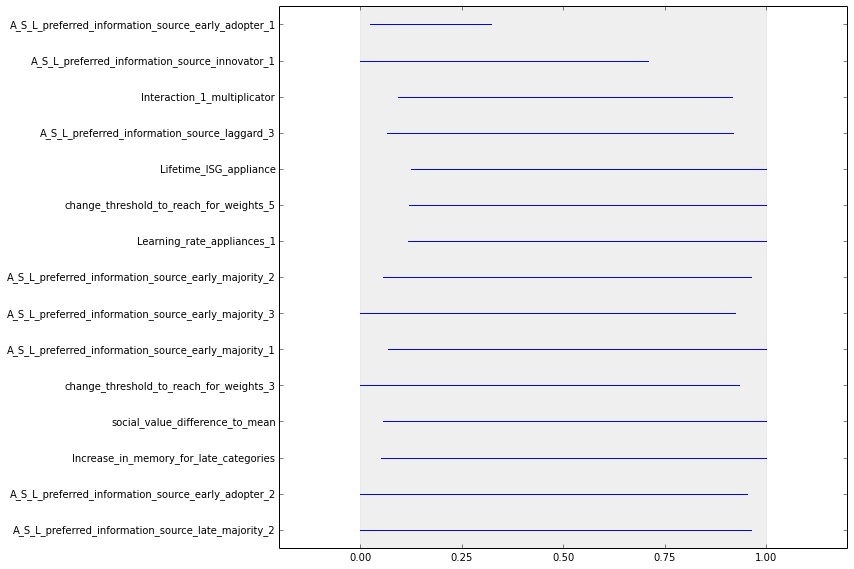

In [49]:
prim_obj.show_boxes()
plt.show()